In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import preprocessing

In [2]:
delt = pd.read_csv("D:/DATA SCIENCE/1. Data Scientist/Assignment/4. simple linear regression/delivery_time.csv")

In [30]:
delt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dt      21 non-null     float64
 1   st      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
delt.columns

Index(['dt', 'st'], dtype='object')

In [6]:
#Calculating the correlation between delivery time and sorting time
delt.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dt', ylabel='Density'>

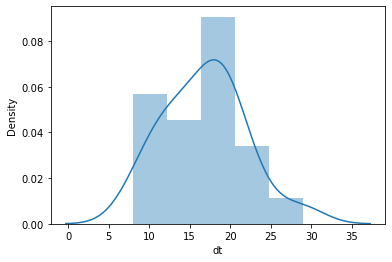

In [33]:
import seaborn as sns
sns.distplot(delt['dt'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='st', ylabel='Density'>

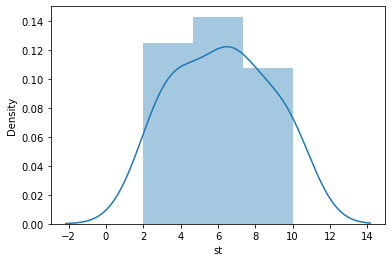

In [32]:
import seaborn as sns
sns.distplot(delt['st'])

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 20.],
        [ 8.,  8.,  4.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([0.22651349, 0.30126295, 0.3760124 , 0.45076185, 0.52551131,
        0.60026076, 0.67501021, 0.74975967, 0.82450912, 0.89925857,
        0.97400803]),
 <a list of 2 BarContainer objects>)

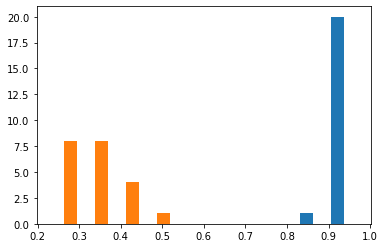

In [7]:
#normalizing
norm_delt = preprocessing.normalize(delt)
plt.hist(norm_delt)

In [12]:
#Building Model 1

In [38]:
mod1 = smf.ols('dt~st',data = delt).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 09 May 2021   Prob (F-statistic):           3.98e-06
Time:                        19:37:09   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

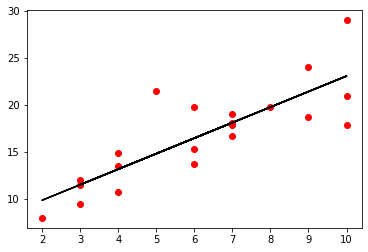

In [21]:
#predicting with model 1
p1_delivery = mod1.predict(delt) 
p1_delivery
plt.scatter(delt.st, delt.dt, color='red');plt.plot(delt.st, p1_delivery,color='black')

In [10]:
#defnimg the Mean Square Error Function
def mse(y_pred,y_actual):
    a=y_pred
    b=y_actual
    mse=np.square(np.subtract(a, b)).mean()
    return mse

In [11]:
#Mean Square Error of Model 1
mse1 = mse(p1_delivery,delt.dt)
mse1

7.793311548584063

In [ ]:
#Building Model 2

In [15]:
mod2 = smf.ols('dt~np.log(st)',data = delt).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 09 May 2021   Prob (F-statistic):           2.64e-06
Time:                        18:54:10   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

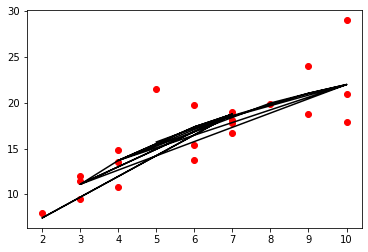

In [16]:
#predicting with model 2
p2_delivery = mod2.predict(delt) 
p2_delivery
plt.scatter(delt.st, delt.dt, color='red');plt.plot(delt.st, p2_delivery,color='black')

In [17]:
#Mean Square Error of Model 2
mse2 = mse(p2_delivery,delt.dt)
mse2

7.470226320948425

In [18]:
#building model 3

In [24]:
mod3 = smf.ols('np.log(dt)~st',data=delt).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(dt)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.59e-06
Time:                        19:16:22   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
st             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

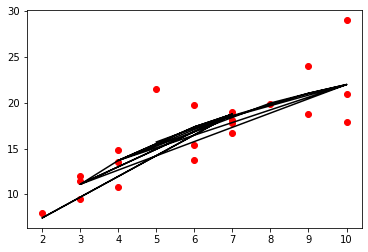

In [25]:
#predicting with model 3
p3_delivery = mod3.predict(delt) 
p3_delivery
plt.scatter(delt.st, delt.dt, color='red');plt.plot(delt.st, p2_delivery,color='black')

In [26]:
#Mean Square Error of Model 3
mse3 = mse(p3_delivery,delt.dt)
mse3

218.90732155191174

In [ ]:
# model 4

In [23]:
mod4 = smf.ols('np.log(dt)~np.log(st)',data=delt).fit()
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(dt)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.60e-07
Time:                        19:13:10   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(st)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

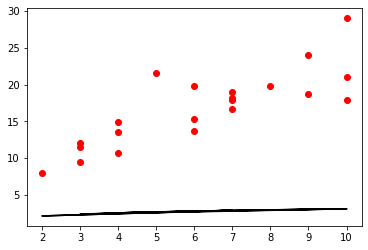

In [27]:
#predicting with model 4
p4_delivery = mod4.predict(delt) 
p4_delivery
plt.scatter(delt.st, delt.dt, color='red');plt.plot(delt.st, p4_delivery,color='black')

In [28]:
#Mean Square Error of Model 2
mse4 = mse(p4_delivery,delt.dt)
mse4

218.80145029911995

In [ ]:
# model1 is best model for predicting delivery time